# **Student Results Analysis – CD Section C**

## Problem Statement
Analyze student academic performance to understand subject-wise trends,
top performers, and overall result patterns.

## Objectives
- Identify subject-wise average performance
- Analyze CGPA distribution
- Study performance of high achievers

## Dataset
Source: "https://docs.google.com/spreadsheets/d/1E0_PiLbTxHj8DzJlIBTZyJpv_vl7yNPEgDtBycNakl0/export?format=csv"

Records: 65 students  
Attributes: Roll No, Subject marks, CGPA


# **Imports**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading**

In [ ]:
import pandas as pd


def read_csv_from_url(url: str) -> pd.DataFrame | None:
    """
    Read a CSV file from a given URL and return it as a pandas DataFrame.

    Args:
        url (str): URL pointing to a CSV file.

    Returns:
        pd.DataFrame | None: Loaded DataFrame if successful, otherwise None.

    Raises:
        ValueError: If the URL is empty or not a string.
    """
    if not isinstance(url, str) or not url.strip():
        raise ValueError("URL must be a non-empty string")

    try:
        return pd.read_csv(url)
    except pd.errors.EmptyDataError:
        print("CSV file is empty.")
    except pd.errors.ParserError:
        print("Error parsing the CSV file.")
    except Exception as error:
        print(f"Failed to load data: {error}")

    return None


**Why ?**

Data is hosted online (Google Drive).
We need a reusable way to load datasets without manual downloads.

**How**

Takes a dataset URL

Reads CSV into a DataFrame

Handles loading errors safely

**Insights**

Real-world data access

Reusability

Clean data ingestion pipeline

# **Basic Data Overview**

**Why**

Before analysis, we must understand the dataset.

**How**

Displays shape, columns, null values, and data types

**Insights**

Prevents wrong assumptions early

In [ ]:
def summarize_dataframe(df: pd.DataFrame) -> dict | None:
    """
    Generate a basic overview of a pandas DataFrame.

    Args:
        df (pd.DataFrame): Input dataset.

    Returns:
        dict | None: Dictionary containing shape, columns, and missing values,
        or None if the DataFrame is invalid or empty.
    """
    if df is None:
        print("DataFrame is None.")
        return None

    if df.empty:
        print("DataFrame is empty.")
        return None

    summary = {
        "shape": df.shape,
        "columns": list(df.columns),
        "missing_values": df.isnull().sum().to_dict()
    }

    return summary


# **Subject List Extraction**

In [ ]:
def get_subjects(df):
    """
    Returns list of subject columns (excluding Roll No and CGPA).
    """
    return [col for col in df.columns if col not in ["Roll No","CGPA"]]


Subject columns should not be hard-coded everywhere.

Dynamically identifies subject columns from the DataFrame

**Insights**

Avoids magic values

Makes the code scalable for new subjects

# **Subject-wise Descriptive Statistics**

In [ ]:
from typing import List


def compute_subject_stats(df: pd.DataFrame,subject_columns: List[str]) -> pd.DataFrame | None:
    """
    Compute descriptive statistics for subject mark columns.

    Args:
        df (pd.DataFrame): Input dataset.
        subject_columns (List[str]): List of subject mark column names.

    Returns:
        pd.DataFrame | None: Descriptive statistics DataFrame,
        or None if inputs are invalid.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return None

    if not subject_columns:
        print("No subject columns provided.")
        return None

    missing_columns = [col for col in subject_columns if col not in df.columns]
    if missing_columns:
        print(f"Missing columns in DataFrame: {missing_columns}")
        return None

    return df[subject_columns].describe()


# **Subject-wise Average Marks**

In [ ]:
import pandas as pd
from typing import List


def compute_subject_averages(
    df: pd.DataFrame,
    subject_columns: List[str]
) -> pd.Series | None:
    """
    Compute average marks for each subject column.

    Args:
        df (pd.DataFrame): Input dataset.
        subject_columns (List[str]): List of subject mark columns.

    Returns:
        pd.Series | None: Series containing subject-wise averages,
        or None if inputs are invalid.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return None

    if not subject_columns:
        print("No subject columns provided.")
        return None

    missing_columns = [col for col in subject_columns if col not in df.columns]
    if missing_columns:
        print(f"Missing columns in DataFrame: {missing_columns}")
        return None

    return df[subject_columns].mean()


# **Plot Subject-wise Performance**

In [ ]:
def plot_subject_averages(avg_scores: pd.Series) -> None:
    """
    Plot subject-wise average marks as a bar chart.

    Args:
        avg_scores (pd.Series): Subject-wise average marks
            where index represents subject names.
    """
    if avg_scores is None or avg_scores.empty:
        print("Average scores data is None or empty.")
        return

    plt.figure(figsize=(8, 5))
    avg_scores.plot(kind="bar")

    plt.title("Subject-wise Average Marks")
    plt.ylabel("Average Marks")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# **CGPA Calculation Function**

In [ ]:
import pandas as pd
from typing import Tuple, Dict

# Default credits mapping (can be passed to function if needed)
CREDITS: Dict[str, float] = {
    'CD121': 3, 'CD122': 2, 'CD123': 2, 'CD124': 3,
    'CD125': 2, 'CD126': 4, 'CD161': 1, 'CD162': 1,
    'CD163': 1, 'CD164': 1.5, 'CD165': 1
}


def get_grade_point(marks: float) -> Tuple[str, int]:
    """
    Convert numeric marks into grade and grade point.

    Args:
        marks (float): Marks obtained in a subject.

    Returns:
        Tuple[str, int]: Grade (string) and grade point (int).
    """
    if marks >= 90:
        return "A+", 10
    elif marks >= 80:
        return "A", 9
    elif marks >= 70:
        return "B", 8
    elif marks >= 60:
        return "C", 7
    elif marks >= 50:
        return "D", 6
    elif marks >= 40:
        return "E", 5
    else:
        return "F", 0


def calculate_cgpa(df: pd.DataFrame, credits: Dict[str, float]) -> pd.DataFrame:
    """
    Calculate subject-wise grades and CGPA for each student.

    Args:
        df (pd.DataFrame): DataFrame containing student marks.
        credits (Dict[str, float]): Mapping of subjects to their credit value.

    Returns:
        pd.DataFrame: Updated DataFrame with subject grades and CGPA.
    """
    if df is None or df.empty:
        raise ValueError("DataFrame is empty or None.")

    total_credits = sum(credits.values())
    cgpa_list = []

    for idx, row in df.iterrows():
        total_points = 0

        for subject, credit in credits.items():
            # Handle missing subjects or invalid marks gracefully
            mark = row.get(subject, None)
            if mark is None or not isinstance(mark, (int, float)):
                grade, gp = "F", 0
            else:
                grade, gp = get_grade_point(mark)

            df.loc[idx, f"{subject}_Grade"] = grade
            total_points += gp * credit

        cgpa = total_points / total_credits
        cgpa_list.append(round(cgpa, 2))

    df["CGPA"] = cgpa_list
    return df


**Why**


Marks need to be converted into grade points for CGPA calculation.

CGPA is the primary academic performance metric.

**How**

Uses a defined grading scale

Converts marks → grade point

Computes average grade point per student

**Insights**

Academic logic modeling

Clear rule-based mapping

Central KPI used across analysis


# **Plot CGPA Distribution**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_cgpa_distribution(
    df: pd.DataFrame,
    bins: int = 10
) -> None:
    """
    Plot the CGPA distribution using a histogram with an overlaid density curve.

    Args:
        df (pd.DataFrame): DataFrame containing a 'CGPA' column.
        bins (int, optional): Number of bins for the histogram. Defaults to 10.

    Returns:
        None
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return

    if "CGPA" not in df.columns:
        print("CGPA column is missing in the DataFrame.")
        return

    cgpa_values = df["CGPA"].dropna()

    if cgpa_values.empty:
        print("No valid CGPA values available for plotting.")
        return

    # ---------- Histogram ----------
    plt.figure(figsize=(7, 5))
    plt.hist(
        cgpa_values,
        bins=bins,
        density=True,          # normalize for density curve
        edgecolor="black",
        alpha=0.6,
        label="Histogram"
    )

    # ---------- Density Curve ----------
    mean = cgpa_values.mean()
    std_dev = cgpa_values.std()

    x = np.linspace(cgpa_values.min(), cgpa_values.max(), 200)
    density = (
        1 / (std_dev * np.sqrt(2 * np.pi))
        * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    )

    plt.plot(x, density, linewidth=2, label="Density Curve",color='b')

    # ---------- Labels ----------
    plt.title("CGPA Distribution with Density Curve")
    plt.xlabel("CGPA")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


Understand overall student performance spread.

**Insights**

Detects skewness

Shows performance consistency

# **Top Performers Analysis**

In [ ]:
def get_top_performers_by_cgpa(df,top_n=10):
  """
    Return students whose CGPA exceeds the specified threshold.

    Args:
        df (pd.DataFrame): DataFrame containing a 'CGPA' column.
        threshold (float, optional): CGPA cutoff for top performers. Defaults to 8.5.

    Returns:
        pd.DataFrame: Subset of students with CGPA above the threshold.
    """
    df_sorted=df.sort_values(by="CGPA",ascending=False)
    return df_sorted.head(top_n)


# **Plot Top Performers Contribution**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_performer_contribution(avg_scores: pd.Series) -> None:
    """
    Plot subject-wise average marks of top performers as a bar chart.

    Args:
        avg_scores (pd.Series): Average marks per subject for top-performing students.
            Index represents subject names and values represent average marks.

    Returns:
        None
    """
    if avg_scores is None or avg_scores.empty:
        print("Average scores data is None or empty.")
        return

    plt.figure(figsize=(8, 5))
    avg_scores.plot(kind="bar", edgecolor='black', alpha=0.7)

    plt.title("Subject Contribution for Top Performers")
    plt.ylabel("Average Marks")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


**Why**

Understand how toppers influence subject averages.

**How**

Shows topper score contribution per subject

**Insights**

Detects score inflation by few students

# **Calculate No_Backlogs**

In [ ]:
from typing import List
def add_no_backlogs_column(
    df: pd.DataFrame,
    subject_columns: List[str] | None = None,
    pass_marks: float = 35
) -> pd.DataFrame:
    """
    Add a 'No_Backlogs' column indicating whether a student passed all subjects.

    Args:
        df (pd.DataFrame): DataFrame containing student marks.
        subject_columns (List[str] | None, optional): List of subject columns to check.
            If None, all columns except the first (assumed to be student ID) are used.
        pass_marks (float, optional): Minimum passing marks. Defaults to 35.

    Returns:
        pd.DataFrame: Updated DataFrame with 'No_Backlogs' column.
            True  -> student passed all subjects
            False -> student has at least one backlog
    """
    if df is None or df.empty:
        raise ValueError("DataFrame is empty or None.")

    # If subject columns are not provided, assume all except first column
    if subject_columns is None:
        subject_columns = df.columns[1:]

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing subject columns in DataFrame: {missing_cols}")

    # Compute No_Backlogs column
    df["No_Backlogs"] = (df[subject_columns] >= pass_marks).all(axis=1)

    return df


Backlogs indicate academic risk.

**How**

Counts failed subjects per student

Adds a new column No_of_Backlogs

**Insights**

Early warning system for students

Used by academic advisors

# **Get Top Performers by CGPA**

In [ ]:
import pandas as pd

def get_top_performers_by_cgpa(
    df: pd.DataFrame,
    top_n: int = 10
) -> pd.DataFrame:
    """
    Return the top N students sorted by CGPA in descending order.

    Args:
        df (pd.DataFrame): DataFrame containing a 'CGPA' column.
        top_n (int, optional): Number of top performers to return. Defaults to 10.

    Returns:
        pd.DataFrame: DataFrame containing top N students by CGPA.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return pd.DataFrame()

    if "CGPA" not in df.columns:
        print("CGPA column is missing in the DataFrame.")
        return pd.DataFrame()

    df_sorted = df.sort_values(by="CGPA", ascending=False)
    return df_sorted.head(top_n).copy()


Identify top-performing students.

**How**

Sorts students by CGPA

Returns top N performers

**Insights**

Merit identification

Useful for scholarships and recognition

# **Count backlogs for each subject**

In [ ]:
import pandas as pd
from typing import List

def get_subject_wise_backlogs(
    df: pd.DataFrame,
    subject_columns: List[str] | None = None,
    pass_marks: float = 35
) -> pd.Series:
    """
    Calculate the number of backlogs per subject.

    Args:
        df (pd.DataFrame): DataFrame containing student marks.
        subject_columns (List[str] | None, optional): List of subject columns to consider.
            If None, all columns except the first (assumed to be student ID) are used.
        pass_marks (float, optional): Minimum passing marks. Defaults to 35.

    Returns:
        pd.Series: Series indexed by subject names with number of backlogs per subject.
    """
    if df is None or df.empty:
        raise ValueError("DataFrame is empty or None.")

    # Use all columns except first if subject_columns not provided
    if subject_columns is None:
        subject_columns = df.columns

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing subject columns in DataFrame: {missing_cols}")

    subject_backlogs = (df[subject_columns] < pass_marks).sum()
    return subject_backlogs


**Why**

We need to know which subjects cause more failures.

**How**

Counts number of students failing each subject

**Insights**

Curriculum difficulty analysis

Focus areas for faculty

Raw averages don’t tell the full story.

**How**

Groups marks into grade buckets per subject

**Insights**

Reveals score spread

Detects grading imbalance

# **Plot subject-wise backlogs**

In [ ]:
def plot_subject_wise_backlogs(subject_backlogs):
    """
    Plots number of backlogs for each subject.
    """
    plt.figure(figsize=(10,5))
    subject_backlogs.plot(kind="bar")
    plt.title("Number of Backlogs per Subject")
    plt.xlabel("Subject")
    plt.ylabel("Number of Backlogs")
    plt.xticks(rotation=45)
    plt.show()


**Why**

Backlogs directly affect graduation timelines.

**How**

Bar chart of backlog counts per subject

**Insights**

Identifies bottleneck subjects

# **Grade Distribution per Subject**

In [ ]:
import pandas as pd
from typing import Dict

def grade_distribution_per_subject(
    df: pd.DataFrame,
    display_output: bool = True
) -> Dict[str, pd.Series]:
    """
    Compute grade distribution for each subject.

    Args:
        df (pd.DataFrame): DataFrame containing grade columns ending with '_Grade'.
        display_output (bool, optional): If True, prints the distribution for each subject.
            Defaults to True.

    Returns:
        Dict[str, pd.Series]: Dictionary mapping grade column names to their value counts.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return {}

    grade_columns = [col for col in df.columns if col.endswith("_Grade")]
    if not grade_columns:
        print("No grade columns found in the DataFrame.")
        return {}

    distribution = {}
    for grade_col in grade_columns:
        counts = df[grade_col].value_counts().sort_index()
        distribution[grade_col] = counts
        if display_output:
            print(f"\nDistribution for {grade_col}:")
            display(counts)

    return distribution


# **Subject-wise Pass Rate Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

def plot_subject_pass_rate(
    df: pd.DataFrame,
    subject_columns: List[str],
    pass_marks: float = 40
) -> pd.Series:
    """
    Calculate and plot the pass rate (%) for each subject.

    Args:
        df (pd.DataFrame): DataFrame containing student marks.
        subject_columns (List[str]): List of subject columns to calculate pass rate for.
        pass_marks (float, optional): Minimum marks required to pass a subject. Defaults to 40.

    Returns:
        pd.Series: Series indexed by subject names with pass rates (%) as values.
    """
    # Input validation
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return pd.Series(dtype=float)

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing subject columns in DataFrame: {missing_cols}")

    total_students = len(df)
    if total_students == 0:
        print("No student records found.")
        return pd.Series(dtype=float)

    # Step 1: Pass count per subject
    pass_counts = (df[subject_columns] >= pass_marks).sum()

    # Step 2: Pass rate calculation
    pass_rate = (pass_counts / total_students) * 100

    # Display pass rates
    print("Pass Rate (%) for each subject:")
    print(pass_rate)

    # Step 3: Plot
    plt.figure(figsize=(8, 5))
    plt.bar(pass_rate.index, pass_rate.values, edgecolor='black', alpha=0.7)

    plt.title("Pass Rate (%) of Each Subject", fontsize=14, fontweight="bold")
    plt.xlabel("Subjects", fontsize=12)
    plt.ylabel("Pass Rate (%)", fontsize=12)

    # Add percentage labels on top of bars
    for i, v in enumerate(pass_rate.values):
        plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontweight="bold")

    plt.ylim(0, 110)
    plt.tight_layout()
    plt.show()

    return pass_rate


**Why**

Pass rate reflects teaching effectiveness.

**How**

Calculates % pass per subject

Visualizes using bar chart

**Insights**

High-impact academic metric

# **KPI DashBoard Summary**

In [ ]:
import pandas as pd
from typing import List, Dict

def generate_kpi_dashboard(
    df: pd.DataFrame,
    subject_columns: List[str],
    pass_marks: float = 40
) -> Dict[str, float]:
    """
    Generate a KPI summary for student performance.

    Args:
        df (pd.DataFrame): DataFrame containing student marks and 'CGPA'.
        subject_columns (List[str]): List of subject columns to evaluate pass rate.
        pass_marks (float, optional): Minimum passing marks for each subject. Defaults to 40.

    Returns:
        Dict[str, float]: Dictionary containing key performance indicators:
            - total_students
            - average_cgpa
            - highest_cgpa
            - lowest_cgpa
            - overall_pass_rate (%)
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return {}

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if "CGPA" not in df.columns:
        missing_cols.append("CGPA")
    if missing_cols:
        raise ValueError(f"Missing required columns in DataFrame: {missing_cols}")

    total_students = len(df)
    avg_cgpa = df["CGPA"].mean()
    highest_cgpa = df["CGPA"].max()
    lowest_cgpa = df["CGPA"].min()

    # Overall pass rate: percentage of students passing all subjects
    pass_rate_overall = df[subject_columns].ge(pass_marks).all(axis=1).mean() * 100

    kpi = {
        "total_students": total_students,
        "average_cgpa": round(avg_cgpa, 2),
        "highest_cgpa": highest_cgpa,
        "lowest_cgpa": lowest_cgpa,
        "overall_pass_rate": round(pass_rate_overall, 2)
    }

    # Display dashboard
    print("===== STUDENT PERFORMANCE DASHBOARD =====")
    print(f"Total Students        : {kpi['total_students']}")
    print(f"Average CGPA          : {kpi['average_cgpa']}")
    print(f"Highest CGPA          : {kpi['highest_cgpa']}")
    print(f"Lowest CGPA           : {kpi['lowest_cgpa']}")
    print(f"Overall Pass Rate (%) : {kpi['overall_pass_rate']}")

    return kpi


**How**

Combines multiple metrics and plots

**Insights**

Executive-level reporting

Strong analytics

# **BOX PLOT to visualize subject-wise score distributions, helping identify variability, median performance, and outliers across courses**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import List

def plot_subject_marks_boxplot(df: pd.DataFrame, subject_columns: List[str]) -> None:
    """
    Plot a boxplot showing the distribution of marks for each subject.

    Args:
        df (pd.DataFrame): DataFrame containing student marks.
        subject_columns (List[str]): List of subject columns to include in the boxplot.

    Returns:
        None
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing subject columns in DataFrame: {missing_cols}")

    plt.figure(figsize=(12, 6))
    plt.boxplot(
        [df[sub] for sub in subject_columns],
        labels=subject_columns,
        patch_artist=True,
        showfliers=True
    )

    plt.title("Distribution of Marks per Subject", fontsize=15, fontweight="bold")
    plt.xlabel("Subjects", fontsize=12)
    plt.ylabel("Marks", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


Outliers distort averages.

**Insights**

Reveals consistency

Identifies anomalies

# **Toppers’ Subject Contribution Plot (> 8.5 CGPA)**

In [ ]:
from typing import List

def plot_toppers_subject_contribution(
    df: pd.DataFrame,
    subject_columns: List[str],
    cgpa_threshold: float = 8.5
) -> pd.Series:
    """
    Plot subject-wise average marks for top-performing students
    based on a CGPA threshold.

    Args:
        df (pd.DataFrame): DataFrame containing student marks and 'CGPA'.
        subject_columns (List[str]): List of subjects to consider.
        cgpa_threshold (float, optional): Minimum CGPA to qualify as a topper. Defaults to 8.5.

    Returns:
        pd.Series: Subject-wise average marks for toppers, sorted ascending for plotting.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return pd.Series(dtype=float)

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if "CGPA" not in df.columns:
        missing_cols.append("CGPA")
    if missing_cols:
        raise ValueError(f"Missing columns in DataFrame: {missing_cols}")

    # Step 1: Filter toppers
    toppers = df[df["CGPA"] > cgpa_threshold]
    if toppers.empty:
        print(f"No students with CGPA > {cgpa_threshold}")
        return pd.Series(dtype=float)

    # Step 2: Compute subject-wise average
    top_avg = toppers[subject_columns].mean()

    # Step 3: Sort ascending for horizontal bar plot
    top_avg = top_avg.sort_values(ascending=True)

    # Step 4: Plot
    plt.figure(figsize=(9, 6))
    sns.barplot(
        x=top_avg.values,
        y=top_avg.index,
        orient="h",
        palette="viridis"
    )

    plt.title(f"Toppers' Subject Contribution (CGPA > {cgpa_threshold})",
              fontsize=15, fontweight="bold")
    plt.xlabel("Average Marks")
    plt.ylabel("Subjects")

    # Step 5: Annotate values
    for i, v in enumerate(top_avg.values):
        plt.text(v + 0.5, i, f"{v:.1f}", va="center", fontweight="bold")

    plt.tight_layout()
    plt.show()

    return top_avg


Check subject strengths of top students.

**How**

Visual breakdown of topper marks

Insights
**bold text**
Skill specialization analysis

# **Weak Subjects for Low-CGPA Students**

In [ ]:
from typing import List

def plot_weak_subjects_low_cgpa(
    df: pd.DataFrame,
    subject_columns: List[str],
    cgpa_threshold: float = 6
) -> pd.Series:
    """
    Plot subject-wise average marks for students with CGPA below a given threshold,
    highlighting weaker subjects.

    Args:
        df (pd.DataFrame): DataFrame containing student marks and 'CGPA'.
        subject_columns (List[str]): List of subject columns to analyze.
        cgpa_threshold (float, optional): CGPA threshold to filter weak students. Defaults to 6.

    Returns:
        pd.Series: Subject-wise average marks for students below the CGPA threshold.
    """
    if df is None or df.empty:
        print("DataFrame is empty or None.")
        return pd.Series(dtype=float)

    missing_cols = [col for col in subject_columns if col not in df.columns]
    if "CGPA" not in df.columns:
        missing_cols.append("CGPA")
    if missing_cols:
        raise ValueError(f"Missing columns in DataFrame: {missing_cols}")

    # Step 1: Filter low CGPA students
    low_students = df[df["CGPA"] < cgpa_threshold]
    if low_students.empty:
        print(f"No students with CGPA < {cgpa_threshold}")
        return pd.Series(dtype=float)

    # Step 2: Compute subject-wise average marks
    low_avg = low_students[subject_columns].mean()

    # Step 3: Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=subject_columns,
        y=low_avg.values,
        palette="magma"
    )

    plt.title(f"Weak Subjects for Students with CGPA < {cgpa_threshold}",
              fontsize=15, fontweight="bold")
    plt.ylabel("Average Marks")
    plt.xlabel("Subjects")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return low_avg


**Why**

Low CGPA students need intervention.

**How**

Filters low CGPA students

Identifies their weakest subjects

**Insights**

Personalized academic support planning

✅ Dataset loaded successfully

Data set Head 
      Reg.No  CD121  CD122  CD123  CD124  CD125  CD126  CD161  CD162  CD163  \
0  Y24CD131     33     51     41     46     56     36     73     87     89   
1  Y24CD132     34     42     66     44     72     46     87     89     87   
2  Y24CD133     92     88     95     93     97     90     94     96     89   
3  Y24CD134     58     69     84     82     78     72     88     90     91   
4  Y24CD135     96     94     82     94     80     85     94     87     98   

   CD164  CD165  
0     81     88  
1     81     82  
2     70     70  
3     91     90  
4     97     94  

--- Dataset Summary ---
shape -> (65, 12)
columns -> ['Reg.No', 'CD121', 'CD122', 'CD123', 'CD124', 'CD125', 'CD126', 'CD161', 'CD162', 'CD163', 'CD164', 'CD165']
missing_values -> {'Reg.No': 0, 'CD121': 0, 'CD122': 0, 'CD123': 0, 'CD124': 0, 'CD125': 0, 'CD126': 0, 'CD161': 0, 'CD162': 0, 'CD163': 0, 'CD164': 0, 'CD165': 0}
✅ Subject columns converted to numeric

--- Subj

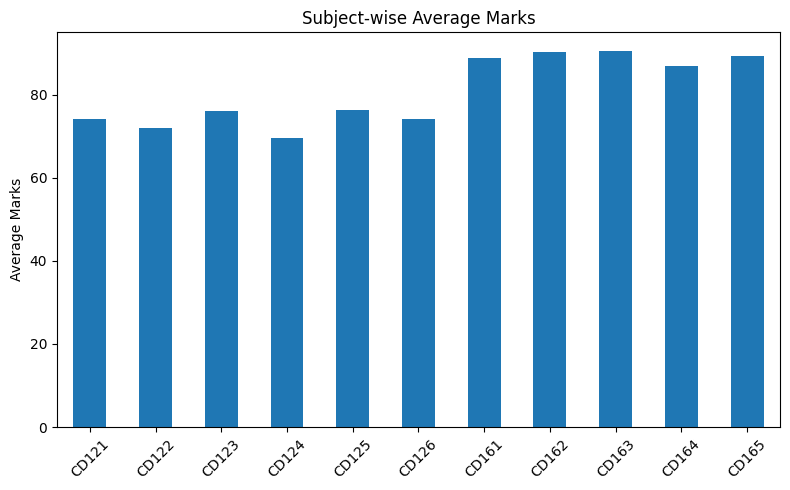

Pass Rate (%) for each subject:
CD121     87.692308
CD122     96.923077
CD123    100.000000
CD124     89.230769
CD125     96.923077
CD126     92.307692
CD161    100.000000
CD162    100.000000
CD163    100.000000
CD164    100.000000
CD165    100.000000
dtype: float64


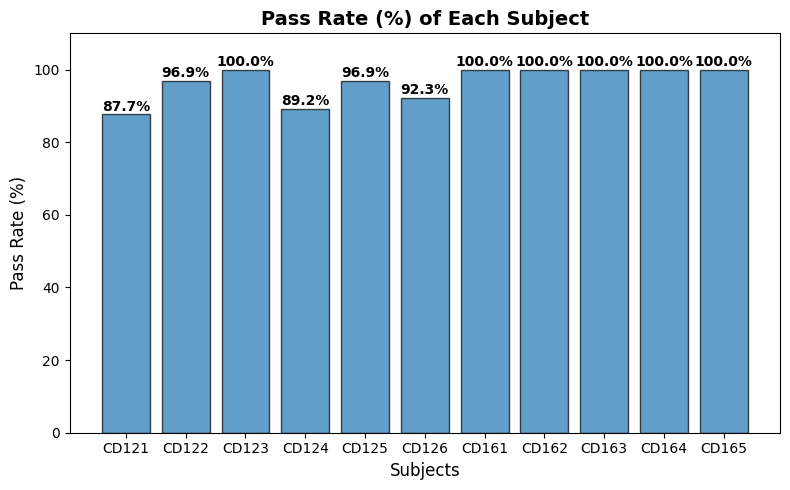

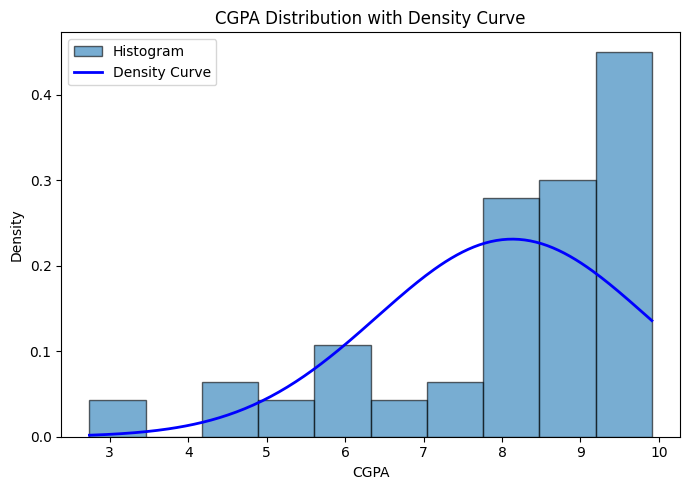



--- Subject-wise Backlogs ---
CD121    8
CD122    2
CD123    0
CD124    5
CD125    2
CD126    3
CD161    0
CD162    0
CD163    0
CD164    0
CD165    0
dtype: int64


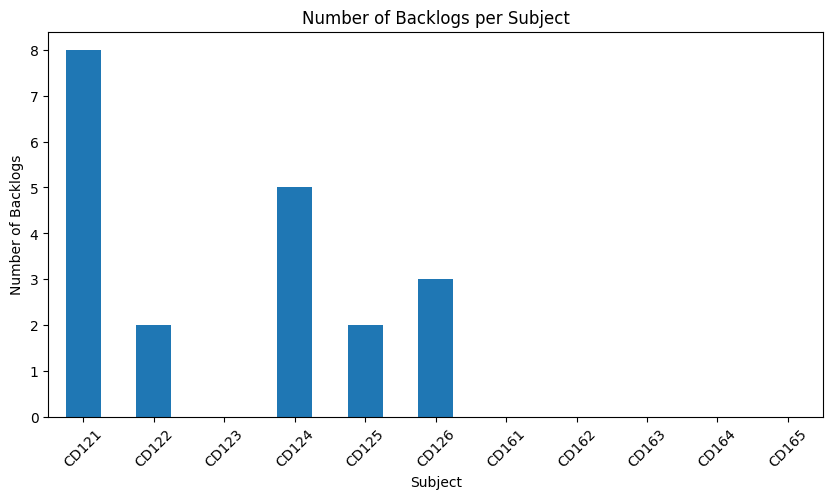



grade distribution per each subject 

Distribution for CD121_Grade:


,count
CD121_Grade,
A,12
A+,25
B,7
C,4
D,2
E,7
F,8



Distribution for CD122_Grade:


,count
CD122_Grade,
A,14
A+,13
B,13
C,6
D,10
E,7
F,2



Distribution for CD123_Grade:


,count
CD123_Grade,
A,31
A+,2
B,19
C,8
D,3
E,2



Distribution for CD124_Grade:


,count
CD124_Grade,
A,13
A+,12
B,10
C,13
D,4
E,6
F,7



Distribution for CD125_Grade:


,count
CD125_Grade,
A,27
A+,7
B,15
C,7
D,3
E,4
F,2



Distribution for CD126_Grade:


,count
CD126_Grade,
A,24
A+,11
B,11
C,6
D,7
E,1
F,5



Distribution for CD161_Grade:


,count
CD161_Grade,
A,23
A+,34
B,8



Distribution for CD162_Grade:


,count
CD162_Grade,
A,22
A+,42
B,1



Distribution for CD163_Grade:


,count
CD163_Grade,
A,33
A+,32



Distribution for CD164_Grade:


,count
CD164_Grade,
A,19
A+,38
B,8



Distribution for CD165_Grade:


,count
CD165_Grade,
A,29
A+,34
B,2


/tmp/ipython-input-3821503924.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


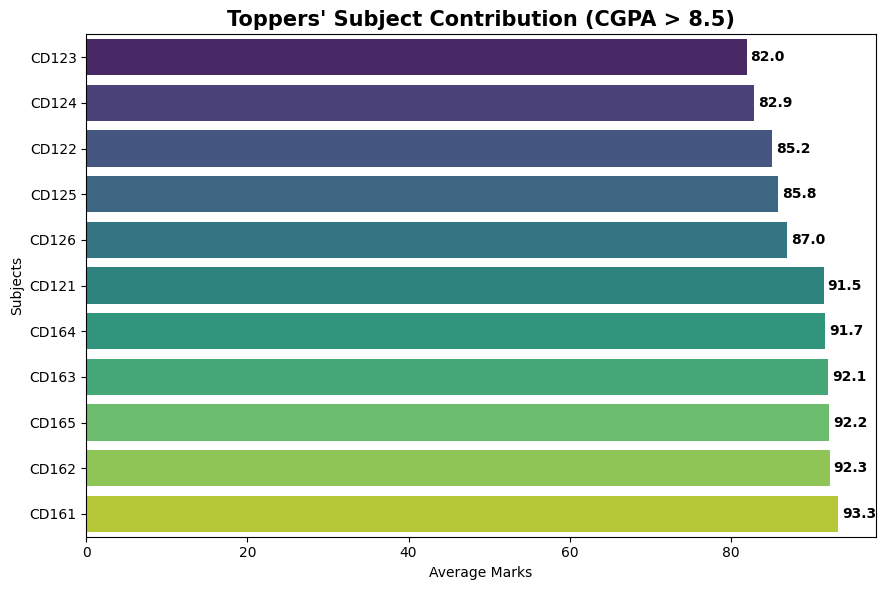

/tmp/ipython-input-995146208.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


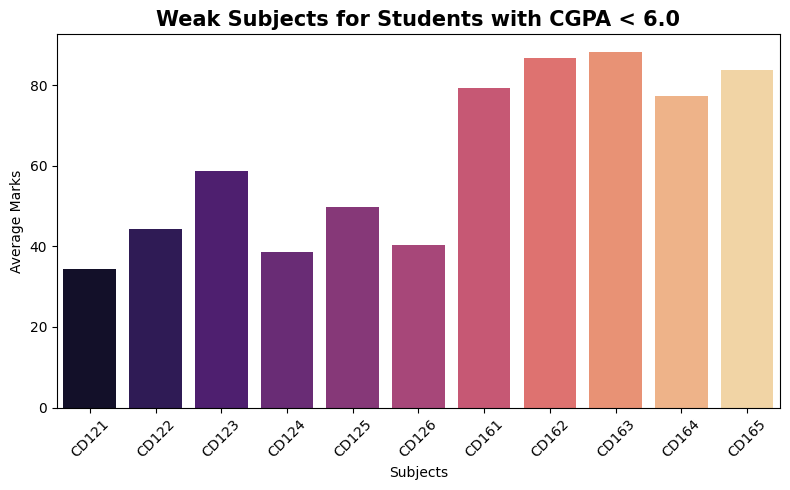

/tmp/ipython-input-702306190.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


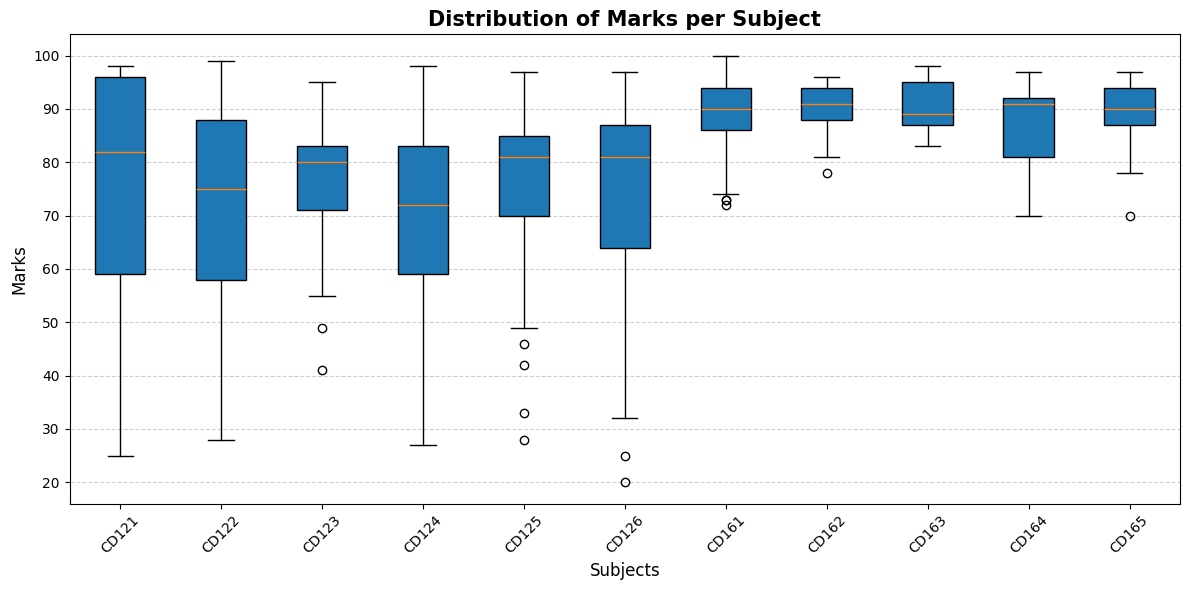


 Analysis Complete Successfully!


In [92]:
def main() -> None:
    """
    Main execution function for student performance analysis.

    Loads dataset, cleans data, computes statistics, CGPA,
    identifies toppers and weak areas, and generates all visualizations.
    """

    # ---------- Constants ----------
    DATASET_URL = (
        "https://docs.google.com/spreadsheets/d/1E0_PiLbTxHj8DzJlIBTZyJpv_vl7yNPEgDtBycNakl0/export?format=csv"
    )
    PASS_MARKS = 35
    TOP_N_STUDENTS = 5
    TOPPER_CGPA_THRESHOLD = 8.5
    LOW_CGPA_THRESHOLD = 6.0

    credits={
    'CD121':3,'CD122':2,'CD123':2,'CD124':3,
    'CD125':2,'CD126':4,'CD161':1,'CD162':1,
    'CD163':1,'CD164':1.5,'CD165':1
    }

    # ---------- Load CSV ----------
    df = read_csv_from_url(DATASET_URL)

    if df is None or df.empty:
        print("❌ Error: Dataset could not be loaded.")
        return

    print("✅ Dataset loaded successfully")
    print("\nData set Head \n",df.head())

    # ---------- Dataset Summary ----------
    summary = summarize_dataframe(df)
    print("\n--- Dataset Summary ---")
    for key,value in summary.items():
      print(key,'->',value)

    # ---------- Identify Subject Columns ----------
    subjects = get_subjects(df)
    subjects=subjects[1:]
    if not subjects:
        print("❌ No subject columns detected.")
        return

    # ---------- Convert Subject Columns to Numeric ----------
    for col in subjects:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    print("✅ Subject columns converted to numeric")

    # ---------- Subject Statistics ----------
    subject_stats = compute_subject_stats(df, subjects)
    print("\n--- Subject Statistics ---")
    print(subject_stats)

    # ---------- Calculate CGPA ----------
    df = calculate_cgpa(df, credits)
    print("\n✅ CGPA calculated")

    # ---------- Add No_Backlogs Column ----------
    df = add_no_backlogs_column(df, subjects, pass_marks=PASS_MARKS)
    print("\n✅ No_Backlogs column added")

    # ---------- Top Performers ----------
    top_students = get_top_performers_by_cgpa(df, top_n=TOP_N_STUDENTS)
    print(f"\n\n--- Top {TOP_N_STUDENTS} Students by CGPA ---")
    print(top_students[["Reg.No", "CGPA"]])

    # ---------- Subject-wise Averages ----------
    avg_scores = compute_subject_averages(df, subjects)
    if avg_scores is not None:
        print("\n\n--- Subject-wise Average Marks ---")
        print(avg_scores)
        plot_subject_averages(avg_scores)
    # ---------- Subject-wise Pass Rate ----------
    pass_rate = plot_subject_pass_rate(
    df=df,
    subject_columns=subjects,
    pass_marks=40
    )

        # ---------- CGPA Distribution ----------
    plot_cgpa_distribution(df)

    # ---------- Subject-wise Backlogs ----------
    backlogs = get_subject_wise_backlogs(df, subjects, pass_marks=PASS_MARKS)
    print("\n\n--- Subject-wise Backlogs ---")
    print(backlogs)

    #plot subject wise backlogs
    plot_subject_wise_backlogs(backlogs)

    #grade distribution per subject
    print("\n\ngrade distribution per each subject ")
    grade_distribution_per_subject(df)

    # ---------- Toppers' Subject Contribution ----------
    plot_toppers_subject_contribution(
        df,
        subjects,
        cgpa_threshold=TOPPER_CGPA_THRESHOLD
    )

    # ---------- Weak Subjects for Low CGPA Students ----------
    plot_weak_subjects_low_cgpa(
        df,
        subjects,
        cgpa_threshold=LOW_CGPA_THRESHOLD
    )

    # ---------- Subject Marks Boxplot ----------
    plot_subject_marks_boxplot(df, subjects)


    print("\n Analysis Complete Successfully!")

main()